#**Projet 2 Machine Learning : les réseaux de neurones**

M2 Mathématiques Parcours STDV, Statistique et données du vivant
---

**Remerciments :** 
*   Nous tenions à remercier tout d'abord M Philippe Carre d'avoir fait preuve de bienveillance en acceptant de nous laisser un délai supplémentaire pour la réalisation de ce projet.

*   Nous tenions également à remercier Mme Wafa Mbarki de nous avoir expliquer certaines notions de manière plus profonde et concrète et de nous avoir conseillé et orienté tout au long du projet à travers les 3 séances de TP de 4h. 


---




 ## **1. Algorithme Perceptron Simple**

In [ ]:
#Importation des libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
from scipy.io import loadmat

### **1.1 Mise en place d’un perceptron simple**
On crée la fonction perceptron simple

**Contexte :** Ce programme doit évaluer la sortie d’un perceptron simple (1 neurone) pour une entrée élément de $\mathbf{R}^2$. 

In [ ]:
def perceptron_simple(x,w,active):
    x0=np.concatenate(([1],x))
    v=np.sum(np.multiply(x0,w))
   
    if active==0:
        y=np.sign(v);
    if active==1:
        y=np.tanh(v)

    return y

**Remarque :** stratégie utilisée pour 
développer le perceptron simple.

Nous avons développé le programme du perceptron simple tout simplement en suivant l'énoncé du sujet et en appliquant des connaissances de base en python.

In [ ]:
def apprentissage_simple(x,yd):
    w= np.random.rand(1,3)-0.5
    alpha=0.1
    mdiff=1
    iter=0
    nx = x.shape[1]
    mdiff=np.zeros(100)
    nbErr = 1
    while ((iter<100) and (nbErr !=0)): 
        
        for b in range(0,nx):
            y=perceptron_simple(x[:,b],w,0) 
            err =(yd[b]-y)
           
            mdiff[iter]=mdiff[iter]+(yd[b]-y)**2
            #StratÃ©goe Online
            #print([y,yd[b]])
            w=w+alpha*err*(np.concatenate(([1],x[:,b])))
            
            #print(w)
        nbErr = mdiff[iter] 
        iter=iter+1

    return w, mdiff

**Remarque :** Nous pouvons voir que dans le progamme de la fonction "apprentissage_simple" que nous avons défini un $\alpha$ égal à 0.1. Il est important de préciser que $\alpha$ est le coefficient d’apprentissage et que nous l'avons défini comme tel sous les recommendation de l'énoncé.


In [ ]:
def affiche_classe(x,clas,K,w):

    t=[np.min(x[0,:]),np.max(x[0,:])]
    z=[(-w[0,0]-w[0,1]*np.min(x[0,:]))/w[0,2],(-w[0,0]-w[0,1]*np.max(x[0,:]))/w[0,2]]
   
    plt.plot(t,z);
    
    ind=(clas==-1)
    plt.plot(x[0,ind],x[1,ind],"o")
    
    ind=(clas==1)
    plt.plot(x[0,ind],x[1,ind],"x")
    plt.axis([np.min(x[0,:]),np.max(x[0,:]),np.min(x[1,:]),np.max(x[1,:])])
    plt.show()

Nous avons décidé de définir la fonction "affiche_classe" pour ainsi faciliter et optimiser l'affichage des graphiques.

**Test du OU Logique :**

In [ ]:
w=[-0.5,1,1]
print("w les poids synaptiques du neurone sont : ",w)
print("Sortie perceptron_simple([0,0],w,0) : ", perceptron_simple([0,0],w,0))
print("Sortie perceptron_simple([0,1],w,0) : ", perceptron_simple([0,1],w,0))
print("Sortie perceptron_simple([1,0],w,0) : ", perceptron_simple([1,0],w,0))
print("Sortie perceptron_simple([1,1],w,0) : ", perceptron_simple([1,1],w,0))

w les poids synaptiques du neurone sont :  [-0.5, 1, 1]
Sortie perceptron_simple([0,0],w,0) :  -1.0
Sortie perceptron_simple([0,1],w,0) :  1.0
Sortie perceptron_simple([1,0],w,0) :  1.0
Sortie perceptron_simple([1,1],w,0) :  1.0


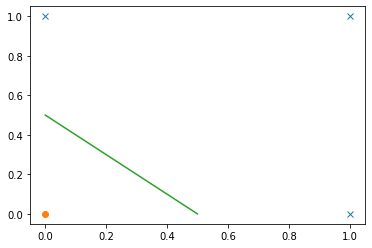

In [ ]:
plt.plot([0,1,1],[1,0,1],"x")
plt.plot([0],[0],"o")
a=-1 
b=0.5
t=[0,0.5] 
z=[a*t[0]+b,a*t[1]+b] 
plt.plot(t,z) 

Nous obtenons exactement le même graphique que celui que nous avons vu en cours.

### **1.2 Etude de l’apprentissage**



##### **1.2.1 Programmation apprentissage Widrow-hoff**

**Contexte :** Ce programme retourne le vecteur de poids w obtenu par apprentissage selon la règle d’apprentissage utilisant
la descente du gradient ainsi que la variable mdiff, noté "erreur" dans l'énoncé, qui contient l’erreur cumulée calculée pour le passage complet de l’ensemble d’apprentissage.

In [ ]:
def apprentissage_widrow_hoff(x,yd):

    w= np.random.rand(1,3)-0.5
    alpha=0.1
    mdiff=1
    iter=0
    nx = x.shape[1]
    mdiff=np.zeros(100)
    nbErr = 1
    while ((iter<100) and (nbErr !=0)): 
        
        for b in range(0,nx):
            y=perceptron_simple(x[:,b],w,0) 
            err =-(yd[b]-y)*(1-np.power(y,2))
           
            mdiff[iter]=mdiff[iter]+(yd[b]-y)**2
            #StratÃ©goe Online
            #print([y,yd[b]])
            w=w+alpha*err*(np.concatenate(([1],x[:,b])))
            
            #print(w)
        nbErr = mdiff[iter] 
        iter=iter+1

    return w, mdiff

**Remarque :** Afin de respecter la consigne de l'énoncé disant de générés les poids initiaux de manière aléatoire nous avons utilisé la fonction prédéfini sur numpy "random.rand()".

 **Remarque :** stratégie utilisée pour 
développer l’apprentissage Widrow.

Un peu comme nous avons développé le programme du perceptron simple, nous avons suivi l'énoncé du sujet. Cependant, les explications de l'enseignante nous ont été utile pour mieux comprendre le fonctionnement et aboutir au code du programme.


#### **1.2.2 Test 1 simple**

Afin de pouvoir tester nos programmes, il nous ait demandé de charger les données du fichier texte "p2_d1".

Ce fichier comprend une variable qui contient l’ensemble d’apprentissage constitué de 2 classes de 25 individus
chacune en dimension 2. Un ”professeur” nous a indiqué que les 25 premiers individus sont issus de la classe 1 et
les 25 derniers de la classe 2.


Affichage des données avec la frontière et de l’évolution de l’erreur pour p2_d1.

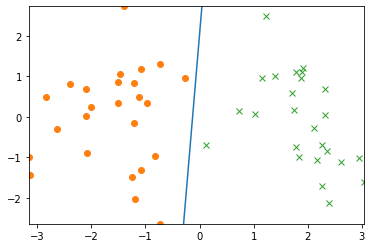

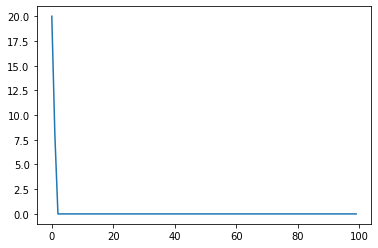

In [ ]:
Data = np.loadtxt('p2_d1.txt')

oracle=np.concatenate((np.zeros(25)-1,np.ones(25)))
w,mdiff=apprentissage_simple(Data,oracle)
affiche_classe(Data,oracle,2,w)
plot(mdiff);

**Remarque :** On observe que

*    la droite qui représente la frontière sépare bien en deux les 2 classes.
*    l'évolution de l'erreur diminue très fortement dès le début pour être nulle après.



Même si cela n'était pas demandé nous avons voulu tester nos programmes également avec les données du fichier texte "p2_d2".

Ce fichier comprend une variable qui contient l’ensemble d’apprentissage constitué de 2 classes de 25 individus chacune en dimension 2. Un ”professeur” nous a indiqué que les 25 premiers individus sont issus de la classe 1 et les 25 derniers de la classe 2.

Affichage des données avec la frontière et de l’évolution de l’erreur pour p2_d2.

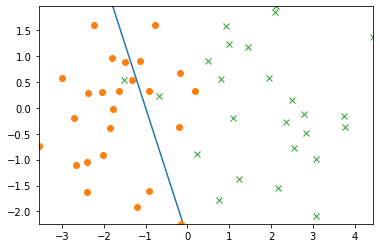

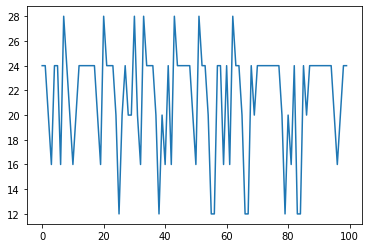

In [ ]:
Data = np.loadtxt('p2_d2.txt')

oracle=np.concatenate((np.zeros(25)-1,np.ones(25)))
w,mdiff=apprentissage_simple(Data,oracle)
affiche_classe(Data,oracle,2,w)
plot(mdiff);

**Remarque :** On observe que

*    la droite qui représente la frontière sépare pas parfaitement bien en deux les 2 classes car plusieurs éléments sont pas du bon côté de la droite.
*    l'évolution de l'erreur fluctue très fortement dès le début jusqu'à la fin.

#### **1.2.3 Test 2**

De la même manière dont nous avons tester nos codes précédement, nous testons nos codes pour l'apprentissage de Widow-Hoff

Affichage des données avec la frontière et de l’évolution de l’erreur pour p2_d1.

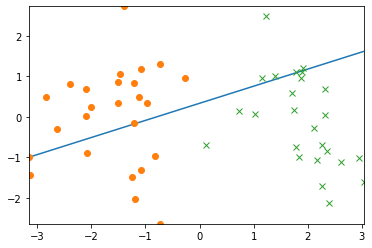

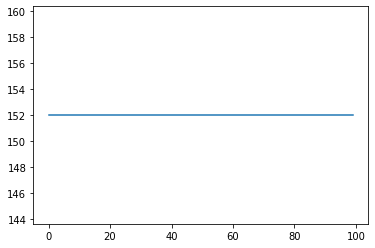

In [ ]:
Data = np.loadtxt('p2_d1.txt')

oracle=np.concatenate((np.zeros(25)-1,np.ones(25)))
w,mdiff=apprentissage_widrow_hoff(Data,oracle)
affiche_classe(Data,oracle,2,w)
plot(mdiff);

**Remarque :** Après plusieurs essais, on observe que

*    la droite qui représente la frontière sépare parfois parfaitement bien en deux les 2 classes et d'autres fois moins bien. Ceci est dû au poids qui sont tirés aléatoirement. 
*    l'évolution de l'erreur ne fluctue pas est reste toujours constante. (Selon les questions que nous avons eu avec l'enseignante, celà semble peu cohérent mais nous n'avons pas su comprendre pourquoi).

Affichage des données avec la frontière et de l’évolution de l’erreur pour p2_d2.

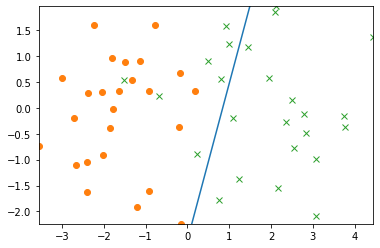

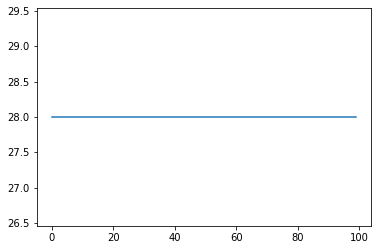

In [ ]:
Data = np.loadtxt('p2_d2.txt')

oracle=np.concatenate((np.zeros(25)-1,np.ones(25)))
w,mdiff=apprentissage_widrow_hoff(Data,oracle)
affiche_classe(Data,oracle,2,w)
plot(mdiff);

**Remarque :** Exactement la même remarque que pour les données issues de p2_d1. 

### **1.3 Perceptron multicouches**



#### **1.3.1 Mise en place d’un perceptron multicouche**
On crée la fonction d'activation :

In [ ]:
def phi(x):
    return 1/(1+np.exp(-x))

Puis la foncton multiperceptron :

In [ ]:
def multiperceptron(x,w1,w2):
    x1= phi(np.dot(np.transpose(w1),np.append(1,x)))
    return phi(np.dot(np.transpose(w2),np.append(1,x1)))

Cette fonction est la multiplication matricielle de l’entrée x avec les poids  des deux neurones de la couche cachée. On rajoute 1 au vecteur d’entrée pour le poids donc on aura un vecteur  avec deux lignes. Ensuite on applique la fonction d’activation à ce vecteur afin de générer x1 qui va nous donner une nouvelle entrée pour le neurone de la couche de sortie.On rajoute encore 1 avant le x1 pour le poids et on refait le même principe sauf qu’il n’y a qu’un neurone sur la couche final donc on aura en sortie un scalaire.

On teste cette fonction avec l'exemple de l'énoncé, ci-dessous, qui nous indique les poids synaptiques des variables w1 et W2 : 

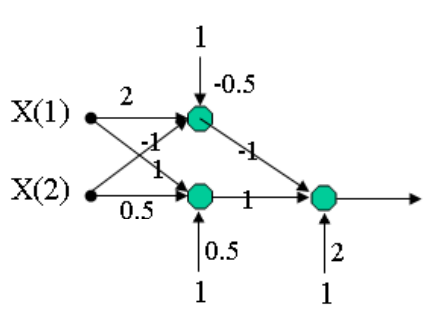

In [ ]:
from IPython.display import Image
Image(filename='Shéma1_3_1.png')


**Résultat "informatique/numérique" :**

In [ ]:
x=np.ones(2)
w1 = np.array([[-0.5,2,-1],[0.5,1,0.5]]).T
w2 = np.array([[2],[-1],[1]])
print(multiperceptron(x,w1,w2))


[0.90536731]


**Résultat "papier" :**

Soit $ω_{i,k}$ le poids synaptique de la couche i,k-ième neurone ,pour la nouvelle entrée on a :$$\displaystyle\sum_{j=0}^2 x(j)ω_{1,1}(j)=1\times(-0.5)+1×2+1×(-1)=0.5$$
Après on utilise la fonction d'activation $ϕ(0.5)=\frac{1}{1+\exp(-0.5)}$ et pour la deuxième entrée on calcule: $$\displaystyle\sum_{j=0}^2 x(j)ω_{1,2}(j)=1\times 0.5+1×1+1×(0.5)=2$$ 
On pose $D=(ϕ(0.5),ϕ(2))^{T}=(\frac{1}{1+\exp(-0.5)},\frac{1}{1+\exp(2)})^{T}$
alors pour la dernière entrée on rajoute 1 en posant $D'=(1,ϕ(0.5),ϕ(2))^{T}$ et on calcule : $$\displaystyle\sum_{j=0}^2 D'(j)ω_{2,1}(j)=1\times 2+1×\dfrac{1}{1+\exp(-0.5)}+1×\dfrac{1}{1+\exp(2)}=2.26$$  Finalement on applique la fonction d'activation sur 2.26, $ϕ(2.26)=0.9055$, on trouve exactement la même valeur que le calcule numérique.



#### **1.3.2 $*$Programmation apprentissage multicouches$*$ :** (partie considérée comme partie bonus)

**Contexte :** Ce programme calcul la sortie d’un perceptron multicouches à 1 neurone sur la couche de sortie et deux neurones sur la couche cachée pour une entrée élément de $\mathbf{R}^2$.


In [ ]:
def multiperceptron_widrow(x,yd):
    alpha = 0.5
    w1 = np.random.rand(3, 2)
    w2 = np.random.rand(3, 1)
    batch_size= x.shape[1]
    mdiff = np.zeros(100)
    iter=0
    nbErr=1
    while ((iter<100) and (nbErr!=0)):
        for k in range(batch_size):
            y=multiperceptron(x[:,k],w1,w2)
            error=yd[k]-y
            mdiff[iter]=mdiff[iter]+error**2
            w1[:,0]=w1[:,0]-alpha*error*(np.concatenate(([1],x[:,k])))
            w1[:,1]=w1[:,1]-alpha*error*(np.concatenate(([1],x[:,k])))

        nbErr=mdiff[iter]
        iter=iter +1
    return error,w1            

**Remarque :** Nous avons dans un premier temps codé la fonction multiperceptron_widrow mais en la testant nous nous sommes aperçu que celle-ci était imcomplète ce qui nous à été confirmé par l'enseignante.

In [ ]:
def multiperceptron_widrow(x,yd):     
    #poids initialisé 
    w1 = np.random.rand(3, 2) 
    w2 = np.random.rand(3, 1) 
    erreur_obs = np.zeros(len(x)) 
    erreur_global = []
    alpha = 0.5
    iters_max = 5000

    for k in range(iters_max+1):
        r = np.zeros([len(x), 1]) 
        for i in range(len(x)):
            x_1 = np.append([[1]], x[i]) 
            u_1 = np.dot(w1.T,x_1) 
            y_1 = phi(u_1)
            y_1cmp = np.append([[1]], y_1)
            u_2 = np.dot(w2.T,y_1cmp)
            y_2 = phi(u_2)  
            erreur_obs[i] = np.power(yd[i] - y_2, 2)
    
            r[i] = -(yd[i] - y_2[0]) * (y_2[0] - np.power(y_2[0], 2)) 
            w2=w2 + (-alpha * y_1cmp.reshape((3,1)) * r[i])
            nb_w1 = len(w1[0])
            error = np.zeros([nb_w1, 1])
    
            for j in range(nb_w1):
                error[j] = (w2[j+1, 0] * r[i]) * (y_1[j] - np.power(y_1[j], 2))
    
            for j in range(nb_w1):
                w1[:, j] = w1[:, j] + (-alpha * x_1 * error[j])
        
        
        if (k%1000) == 0 :    
                x_test = np.array([[0, 1, 0, 1], [0, 0, 1, 1]])
                plt.scatter(x_test[0],x_test[1],c = np.array([0,1,1,0]))   
                plt.plot(x_test[0],- (w2[1]/w2[2])*x_test[0] + - (w2[0]/w2[2]), c ='black')
                plt.plot(x_test[0],- (w1[:,0][1]/w1[:,0][2])*x_test[0] + - (w1[:,0][0]/w1[:,0][2]), c ='blue')
                plt.plot(x_test[0],- (w1[:,1][1]/w1[:,1][2])*x_test[0] + - (w1[:,1][0]/w1[:,1][2]), c ='green')
                plt.show() 
                print('Iteration:' + str(k) + str(' ') + 'Erreur:' + str(np.mean(erreur_obs)) )   
                
        erreur_global.append(np.mean(erreur_obs)) 
    return w1,w2,erreur_global

**Remarque :** stratégie utilisée pour 
développer le perceptron Multicouche.

Nous nous sommes basés premièrement sur la première version de la fonction multiperceptron_widrow que nous ayons fait, comme vu ci-dessus, qui elle-même était basée sur les consignes de l'énoncé mais égalment sur ce que nous avons pû constitué dans les parties précédentes. 

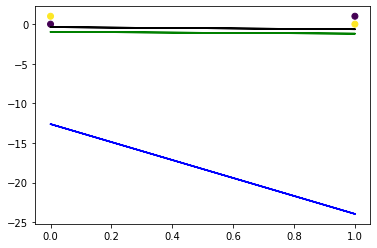

Iteration:0 Erreur:0.29205860866495753


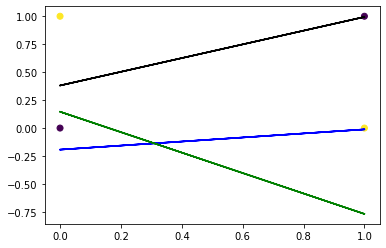

Iteration:1000 Erreur:0.17009297809453125


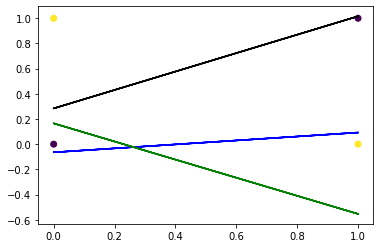

Iteration:2000 Erreur:0.1422806421180023


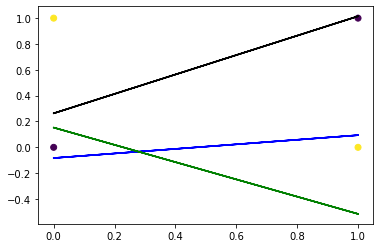

Iteration:3000 Erreur:0.13980639232704223


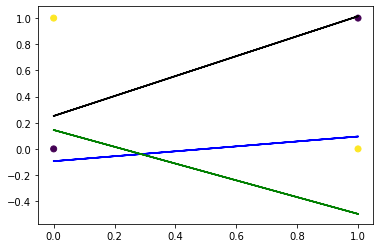

Iteration:4000 Erreur:0.13898574820169857


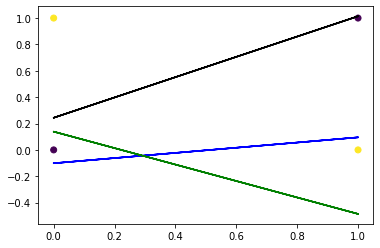

Iteration:5000 Erreur:0.1385900398528584


Text(0, 0.5, 'Erreur')

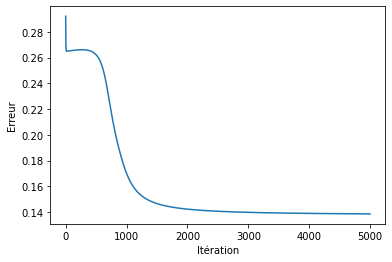

In [ ]:
#XOR TEST : 
x= np.array([[0,0],[1,0],[0,1],[1,1]])
yd = np.array([0,1,1,0]) 
w1,w2,erreur = multiperceptron_widrow(x, yd)  

#Plot erreur :
plt.plot(erreur)  
plt.xlabel("Itération")
plt.ylabel("Erreur")

In [ ]:
w1 = np.array([[-0.5,2,-1],[0.5,1,0.5]]).T
w2 = np.array([[2],[-1],[1]])
y=multiperceptron(Data[:,2],w1,w2)
y

array([0.88392659])

In [ ]:
Data[1:].shape

(1, 50)

In [ ]:
w1

array([[-0.5,  0.5],
       [ 2. ,  1. ],
       [-1. ,  0.5]])

In [ ]:
w1[:,1]

array([0.5, 1. , 0.5])

In [ ]:
error=3
alpha=0.5
w1[:,0]=w1[:,0]+alpha*error*(np.concatenate(([1],Data[:,0])))


In [ ]:
w1

array([[ 1.        ,  0.5       ],
       [ 2.28012203,  1.        ],
       [-0.50889968,  0.5       ]])

Tester l'algorithme d’apprentissage pour le cas du XOR. La table de cette fonction est :

In [ ]:
x1 = np.array([0,1,0,1])
print(x1)
x2 = np.array([0,0,1,1])
print(x2)
y_desire = np.array([0,1,1,0])
print(y_desire)

[0 1 0 1]
[0 0 1 1]
[0 1 1 0]


## **2. Deep et Full-connected : discrimination d’une image**


### **2.1 Approche basée Descripteurs (basée modèle)**


#### **2.1.1 Calcul des descripteurs**

In [ ]:
# Importation des librairies :
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)

Importation des 5 ensembles de mesures (JCD, PHOG, CEDD, FCTH et Fuzzy Color Histogram) qui pour chacun caractérise chaque image dans un seul dataframe que nous nommerons *data* suivi d'un numéro de 1 à 5. Et concaténation des 5 dta frames en un seul data frame nommé "DATA".

In [ ]:
# Importation des feuilles du fichier Excel et concaténation : 
data1=pd.read_excel("WangSignatures.xlsx",sheet_name=0,header=None)
data2=pd.read_excel("WangSignatures.xlsx",sheet_name=1,header=None)
data3=pd.read_excel("WangSignatures.xlsx",sheet_name=2,header=None)
data4=pd.read_excel("WangSignatures.xlsx",sheet_name=3,header=None)
data5=pd.read_excel("WangSignatures.xlsx",sheet_name=4,header=None)
from sklearn import model_selection
DATA=pd.concat([data1.iloc[:,1:],data2.iloc[:,1:],data3.iloc[:,1:],data4.iloc[:,1:],data5.iloc[:,1:]],axis=1)
DATA

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,...,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
0,10.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,7.0,7.0,7.0,9.0,10.0,12.0,15.0,12.0,11.0,10.0,10.0,11.0,10.0,10.0,10.0,10.0,9.0,8.0,8.0,8.0,8.0,8.0,6.0,7.0,6.0,7.0,8.0,8.0,10.0,10.0,11.0,10.0,9.0,12.0,14.0,13.0,15.0,11.0,11.0,10.0,10.0,11.0,12.0,12.0,11.0,12.0,12.0,10.0,9.0,7.0,8.0,11.0,8.0,7.0,6.0,7.0,7.0,7.0,7.0,6.0,7.0,8.0,7.0,9.0,9.0,9.0,10.0,10.0,11.0,12.0,11.0,13.0,13.0,14.0,15.0,13.0,11.0,9.0,9.0,9.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,7.0,6.0,5.0,4.0,5.0,6.0,7.0,9.0,11.0,15.0,13.0,13.0,11.0,12.0,11.0,9.0,8.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0,8.0,6.0,6.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,4.0,5.0,7.0,8.0,12.0,15.0,11.0,8.0,5.0,6.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,6.0,6.0,8.0,6.0,8.0,7.0,6.0,8.0,9.0,13.0,11.0,13.0,13.0,11.0,14.0,12.0,11.0,11.0,7.0,7.0,6.0,8.0,8.0,13.0,15.0,13.0,13.0,13.0,12.0,14.0,9.0,9.0,4.0,4.0,4.0,3.0,4.0,6.0,3.0,3.0,5.0,5.0,3.0,4.0,8.0,10.0,9.0,15.0,11.0,10.0,9.0,8.0,10.0,8.0,7.0,8.0,10.0,9.0,7.0,6.0,5.0,4.0,15.0,14.0,10.0,10.0,10.0,9.0,6.0,8.0,7.0,5.0,5.0,7.0,6.0,7.0,10.0,11.0,8.0,9.0,6.0,8.0,11.0,11.0,9.0,8.0,9.0,10.0,8.0,5.0,7.0,9.0,13.0,8.0,5.0,4.0,4.0,5.0,3.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191.0,194.0,141.0,107.0,82.0,146.0,205.0,170.0,120.0,89.0,112.0,140.0,143.0,118.0,89.0,87.0,101.0,105.0,97.0,81.0,69.0,77.0,79.0,76.0,68.0,131.0,158.0,141.0,114.0,92.0,150.0,255.0,213.0,139.0,99.0,122.0,171.0,209.0,166.0,105.0,93.0,113.0,125.0,122.0,97.0,73.0,82.0,88.0,86.0,76.0,101.0,118.0,115.0,100.0,82.0,117.0,158.0,154.0,125.0,96.0,109.0,159.0,189.0,159.0,107.0,89.0,110.0,126.0,132.0,109.0,71.0,81.0,88.0,89.0,83.0,80.0,89.0,90.0,82.0,71.0,88.0,104.0,108.0,97.0,81.0,87.0,108.0,123.0,110.0,90.0,77.0,92.0,106.0,108.0,95.0,65.0,73.0,80.0,83.0,82.0,64.0,70.0,71.0,67.0,61.0,69.0,76.0,79.0,75.0,67.0,69.0,78.0,83.0,79.0,70.0,64.0,72.0,78.0,79.0,7

**Remarque :** Une autre importation des data frames possible consiste à faire comme ci-dessous, c'est-à-dire à concaténer avec la fonction np.concatenate() l'un après l'autre les différentes feuilles du fichier Excel "WangSignatures" mais celà comporte plus de ligne de code. Le code suivant est donc présent ci-dessous qu'à titre d'information.

**Précision :** La fonction .shape nous permet de donner les dimensions du data frame importé pour pouvoir les comparé avec le fichier Excel et voir si nous avions le bon nombre de lignes et de colonnes.

In [ ]:
from xlrd.biffh import XL_XF4
X1 = pd.read_excel("WangSignatures.xlsx",sheet_name=0,index_col=0,header=None)
Data1=X1.values
print(Data1.shape)

X2 = pd.read_excel("WangSignatures.xlsx",sheet_name=1,index_col=0,header=None)
Data2=X2.values
Data=np.concatenate((Data1,Data2),axis=1)
print(Data.shape)

X3 = pd.read_excel("WangSignatures.xlsx",sheet_name=2,index_col=0,header=None)
Data3=X3.values
Data=np.concatenate((Data2,Data3),axis=1)
print(Data.shape)

X4 = pd.read_excel("WangSignatures.xlsx",sheet_name=3,index_col=0,header=None)
Data4=X4.values
Data=np.concatenate((Data3,Data4),axis=1)
print(Data.shape)

X5 = pd.read_excel("WangSignatures.xlsx",sheet_name=4,index_col=0,header=None)
Data5=X5.values
Data=np.concatenate((Data4,Data5),axis=1)
print(Data.shape)


(1000, 255)
(1000, 423)
(1000, 312)
(1000, 336)
(1000, 317)


In [ ]:
X5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.jpg,191.0,194.0,141.0,107.0,82.0,146.0,205.0,170.0,120.0,89.0,112.0,140.0,143.0,118.0,89.0,87.0,101.0,105.0,97.0,81.0,69.0,77.0,79.0,76.0,68.0,131.0,158.0,141.0,114.0,92.0,150.0,255.0,213.0,139.0,99.0,122.0,171.0,209.0,166.0,105.0,93.0,113.0,125.0,122.0,97.0,73.0,82.0,88.0,86.0,76.0,101.0,118.0,115.0,100.0,82.0,117.0,158.0,154.0,125.0,96.0,109.0,159.0,189.0,159.0,107.0,89.0,110.0,126.0,132.0,109.0,71.0,81.0,88.0,89.0,83.0,80.0,89.0,90.0,82.0,71.0,88.0,104.0,108.0,97.0,81.0,87.0,108.0,123.0,110.0,90.0,77.0,92.0,106.0,108.0,95.0,65.0,73.0,80.0,83.0,82.0,64.0,70.0,71.0,67.0,61.0,69.0,76.0,79.0,75.0,67.0,69.0,78.0,83.0,79.0,70.0,64.0,72.0,78.0,79.0,71.0,57.0,62.0,67.0,69.0,69.0
1.jpg,255.0,218.0,149.0,112.0,87.0,150.0,195.0,173.0,131.0,98.0,113.0,138.0,143.0,123.0,98.0,89.0,102.0,107.0,100.0,86.0,72.0,79.0,82.0,79.0,72.0,154.0,175.0,153.0,121.0,94.0,150.0,241.0,233.0,168.0,114.0,120.0,163.0,206.0,171.0,124.0,94.0,113.0,127.0,122.0,102.0,75.0,85.0,90.0,89.0,82.0,111.0,128.0,126.0,110.0,90.0,120.0,163.0,168.0,143.0,110.0,109.0,148.0,213.0,177.0,135.0,90.0,111.0,132.0,138.0,114.0,73.0,84.0,92.0,94.0,86.0,86.0,97.0,98.0,91.0,79.0,93.0,111.0,118.0,109.0,92.0,90.0,112.0,133.0,126.0,104.0,80.0,95.0,112.0,135.0,110.0,68.0,77.0,85.0,91.0,86.0,70.0,76.0,77.0,74.0,67.0,73.0,82.0,86.0,83.0,74.0,73.0,83.0,90.0,89.0,80.0,67.0,76.0,84.0,89.0,81.0,60.0,66.0,72.0,76.0,75.0
10.jpg,178.0,211.0,171.0,130.0,101.0,137.0,194.0,213.0,160.0,117.0,112.0,142.0,160.0,150.0,119.0,93.0,110.0,121.0,121.0,108.0,78.0,89.0,96.0,97.0,91.0,129.0,165.0,164.0,137.0,108.0,136.0,225.0,255.0,197.0,134.0,119.0,166.0,209.0,214.0,148.0,99.0,123.0,145.0,152.0,134.0,83.0,97.0,109.0,114.0,108.0,104.0,125.0,132.0,122.0,103.0,114.0,150.0,175.0,162.0,128.0,110.0,149.0,223.0,215.0,158.0,97.0,123.0,157.0,183.0,160.0,83.0,99.0,116.0,130.0,123.0,87.0,99.0,105.0,102.0,92.0,94.0,112.0,126.0,125.0,110.0,94.0,117.0,142.0,153.0,133.0,88.0,108.0,138.0,195.0,164.0,78.0,93.0,114.0,147.0,154.0,73.0,81.0,85.0,85.0,79.0,78.0,89.0,97.0,98.0,91.0,80.0,93.0,106.0,113.0,106.0,77.0,91.0,108.0,131.0,130.0,71.0,83.0,99.0,130.0,246.0
100.jpg,189.0,173.0,135.0,102.0,80.0,130.0,157.0,143.0,115.0,89.0,104.0,122.0,124.0,114.0,92.0,84.0,95.0,99.0,96.0,84.0,69.0,75.0,78.0,76.0,69.0,143.0,163.0,139.0,110.0,86.0,146.0,255.0,195.0,139.0,100.0,118.0,158.0,170.0,152.0,109.0,93.0,110.0,119.0,114.0,94.0,74.0,83.0,88.0,86.0,77.0,113.0,129.0,123.0,104.0,85.0,128.0,174.0,172.0,135.0,100.0,115.0,161.0,211.0,186.0,112.0,94.0,115.0,132.0,131.0,102.0,75.0,86.0,94.0,93.0,83.0,93.0,101.0,100.0,91.0,77.0,108.0,122.0,125.0,111.0,90.0,100.0,142.0,155.0,135.0,101.0,87.0,108.0,128.0,141.0,106.0,72.0,83.0,92.0,96.0,91.0,74.0,80.0,81.0,76.0,68.0,81.0,91.0,94.0,88.0,76.0,81.0,98.0,106.0,99.0,85.0,75.0,88.0,100.0,105.0,95.0,65.0,73.0,81.0,89.0,136.0
101.jpg,60.0,65.0,56.0,52.0,47.0,58.0,64.0,64.0,59.0,53.0,57.0,64.0,66.0,63.0,57.0,55.0,61.0,65.0,64.0,58.0,51.0,57.0,60.0,60.0,56.0,60.0,65.0,63.0,59.0,53.0,68.0,80.0,80.0,72.0,63.0,71.0,82.0,90.0,85.0,72.0,68.0,79.0,87.0,87.0,76.0,61.0,70.0,77.0,78.0,71.0,64.0,68.0,68.0,64.0,58.0,83.0,89.0,91.0,84.0,72.0,93.0,109.0,131.0,116.0,90.0,83.0,103.0,127.0,136.0,105.0,71.0,85.0,101.0,110.0,96.0,66.0,70.0,70.0,66.0,60.0,95.0,98.0,96.0,89.0,76.0,146.0,158.0,140.0,131.0,103.0,97.0,133.0,173.0,255.0,147.0,77.0,98.0,125.0,162.0,144.0,61.0,66.0,66.0,63.0,58.0,78.0,87.0,88.0,83.0,73.0,94.0,119.0,125.0,116.0,95.0,88.0,122.0,180.0,170.0,133.0,74.0,94.0,121.0,150.0,168.0
...,...,...,...,...,

In [ ]:
Data

array([[  1.,   4.,   3., ...,  67.,  69.,  69.],
       [  1.,   5.,   5., ...,  72.,  76.,  75.],
       [  5.,   5.,   2., ...,  99., 130., 246.],
       ...,
       [  7.,   4.,   1., ...,  75., 133., 255.],
       [  2.,   3.,   6., ...,  43.,  48.,  48.],
       [  3.,   6.,   3., ...,  95., 113., 109.]])

La base est composée de 10 types/thèmes d’images comme défini par là suite :

In [ ]:
theme=["Jungle", "Plage", "Monuments", "Bus", "Dinosaures", "Eléphants", "Fleurs", "Chevaux"," Montagne", "Plats"]

Nous avons réalisé différents codes aboutissant au résultat souhaité par l'énoncé, étant de créer un vecteur de label indiquant la classe sous forme d’un
chiffre de chaque image comme par exemple la classe de l’image de nom “i.jpg” est contenue dans label[i].


---

**Code A :**

In [ ]:
index=X5.index.values.tolist()
print(type(index))
index[0:5]

<class 'list'>


['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '12.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '14.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '15.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '16.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '17.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '17

On peut s'apercevoir en affichant les 5 premiers élements de la liste index que les chiffres associés aux imagines ne sont pas triés dans un ordre parfait. On peut égalment s'en apercevoir en ouvrant le fichier Excel "WangSignatures".  

On souhaite compiler tous les chiffres dans une seule liste qu'on nommera *p* mais avant pour cela il faut garder que le chiffre associé à l'image. Il est possible de réaliser cela en applicant une boucle simple sur la liste index pour qu'elle suprime les 4 derniers caractères de chaque élément de la liste qui correspondent au *.jpg*.

In [ ]:
for i in np.arange(0,1000):
  index[i]=index[i][:-4]
print(index[1:10])

p=[]
for i in np.arange(0,1000):
  p.append(int(index[i]))
print(p[1:10])

['1', '10', '100', '101', '102', '103', '104', '105', '106']
[1, 10, 100, 101, 102, 103, 104, 105, 106]


In [ ]:
label=[]
for i in np.arange(0,1000) :
  if p[i]<99 :
    label.append(theme[0])
  elif p[i]<199 :
    label.append(theme[1])
  elif p[i]<299 :
    label.append(theme[2])
  elif p[i]<399 :
    label.append(theme[3])
  elif p[i]<499 :
    label.append(theme[4])
  elif p[i]<599 :
    label.append(theme[5])
  elif p[i]<699 :
    label.append(theme[6])
  elif p[i]<799 :
    label.append(theme[7])
  elif p[i]<899 :
    label.append(theme[8])
  else:
    label.append(theme[9])
print(label[455:460])
print(p[455:460])

['Eléphants', 'Eléphants', 'Jungle', 'Eléphants', 'Eléphants']
[508, 509, 51, 510, 511]


In [ ]:
vec=np.transpose(label)
new_table = np.c_[Data,vec]
print(new_table.shape)
new_table

(1000, 318)


array([['1.0', '4.0', '3.0', ..., '69.0', '69.0', 'Jungle'],
       ['1.0', '5.0', '5.0', ..., '76.0', '75.0', 'Jungle'],
       ['5.0', '5.0', '2.0', ..., '130.0', '246.0', 'Jungle'],
       ...,
       ['7.0', '4.0', '1.0', ..., '133.0', '255.0', 'Plats'],
       ['2.0', '3.0', '6.0', ..., '48.0', '48.0', 'Plats'],
       ['3.0', '6.0', '3.0', ..., '113.0', '109.0', 'Plats']],
      dtype='<U32')



---


Dans la même idée que nous avons produit le code A, nous avons également produit le code B, ci-dessous, mais à la différence que ce dernier est plus succint, efficace et professionnel dans le sens moins brouillon. 

**Code B :**

In [ ]:
vect=data1[0].values
print(vect[1:10])
label=[]
for i in vect:
    label.append(int(i.split(".")[0]))
print(label[1:10])

Label=np.ones(1000)
for i in range(1000):
    if 0<=label[i]<=99:
        Label[i]=1
    if 100<=label[i]<=199:
        Label[i]=2
    if 200<=label[i]<=299:
        Label[i]=3
    if 300<=label[i]<=399:
        Label[i]=4
    if 400<=label[i]<=499:
        Label[i]=5
    if 500<=label[i]<=599:
        Label[i]=6
    if 600<=label[i]<=699:
        Label[i]=7
    if 700<=label[i]<=799:
        Label[i]=8
    if 800<=label[i]<=899:
        Label[i]=9
    if 900<=label[i]<=999:
        Label[i]=10
print(Label[1:10])

['1.jpg' '10.jpg' '100.jpg' '101.jpg' '102.jpg' '103.jpg' '104.jpg'
 '105.jpg' '106.jpg']
[1, 10, 100, 101, 102, 103, 104, 105, 106]
[1. 1. 2. 2. 2. 2. 2. 2. 2.]


In [ ]:
LABEL=Label-1
LABEL[1:10]

array([0., 0., 1., 1., 1., 1., 1., 1., 1.])

Comme nous pouvons le voir avec le code précédent, il suffit d'associer le bon thème en fonction de la valeur de la liste p (pour le code A) ou label (pour le code B) qui est issue comme nous l'avons vu de l'index pour ainsi constituer la liste *label*.

#### **2.1.2 Mise en place d’un système de discrimination basée structure Full-Connected**

In [ ]:
# Importation des librairies : 
from keras.models import Sequential
from keras.layers import Flatten, MaxPool2D, Conv2D, Dense, Reshape, Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [ ]:
def predict_classes(self, x, batch_size=32, verbose=1):
    '''Generate class predictions for the input samples
    batch by batch.
    # Arguments
        x: input data, as a Numpy array or list of Numpy arrays
            (if the model has multiple inputs).
        batch_size: integer.
        verbose: verbosity mode, 0 or 1.
    # Returns
        A numpy array of class predictions.
    '''
    proba = self.predict(x, batch_size=batch_size, verbose=verbose)
    if proba.shape[-1] > 1:
        return proba.argmax(axis=-1)
    else:
        return (proba > 0.5).astype('int32')

Classification K-nearest neighbors(kNN) autrement appelé l’algorithme des K plus proches voisins.

"sklearn" est une librairie assez répendu qui facilite la séparation de l’ensemble de données en deux sous ensemble l'un nommée "train" qui est l'ensemble d’entraînement pour entraîner le modèle d’apprentissage  et d’un autre "test" qui est ensemble de données de test pour vérifier si les prédictions sont proche ou non.

Nous avons utiliser la fonction train_test_split pour ainsi constituer nos deux ensembles.

**Remarque** : nous avons le paramètre test_size=0.2 qui représente la proportion du jeu de données à inclure dans le fractionnement de l'ensemble test. Autrement dit : 20% des données sont dans l'ensemble test alors que les 80% autres restant sont dans l'ensemble d'entrainmement.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data2.iloc[:,1:],Label,random_state=1,test_size=0.2)
#X_train, X_test, Y_train, Y_test, = train_test_split(Mesure5, label, test_size=0.2, random_state=1)

In [ ]:
np.shape(X_test)

(200, 168)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
rep_knn = knn.predict(X_test)
matrice_confusion=confusion_matrix(Y_test, rep_knn)
matrice_confusion

array([[14,  0,  0,  0,  0,  3,  0,  0,  0,  1],
       [ 2, 14,  1,  1,  0,  0,  0,  0,  1,  0],
       [ 1,  0, 18,  1,  0,  2,  0,  0,  0,  0],
       [ 1,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 13,  0,  0,  0,  0,  0],
       [ 2,  1,  1,  0,  0, 20,  0,  1,  1,  1],
       [ 2,  0,  0,  0,  0,  0, 20,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 22,  0,  0],
       [ 0,  8,  2,  0,  0,  1,  0,  0, 10,  0],
       [ 3,  0,  0,  0,  2,  0,  0,  0,  0, 12]])

**Définition générale :** En apprentissage automatique supervisé, la matrice de confusion est une matrice qui mesure la qualité d'un système de classification. Chaque ligne correspond à une classe réelle, chaque colonne correspond à une classe estimée. 
L'intérêts de la matrice de confusion est qu'elle montre rapidement si un système de classification parvient à classifier correctement.

**Remarque :** Ici on peut voir que la majorité des données sont bien classées en observant les chiffres sur la diagonales. Cependant, on remarque égalment qu'il y a quand même un certain nombre de données qui ont été mal classées.

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

In [ ]:
premiere_couche = Dense(units=50,input_dim=168, activation="sigmoid")
deux_couche= Dense(units=50, activation="sigmoid")
couche_sortie = Dense(units=10, activation="sigmoid")
label = to_categorical(LABEL)
X_train,X_test,Y_train,Y_test=train_test_split(data2.iloc[:,1:],label,random_state=1,test_size=0.2)
opt = SGD(lr=0.01, momentum=0.9)
model = Sequential()
model.add(premiere_couche)
model.add(deux_couche)
model.add(couche_sortie)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
history=model.fit(X_train, Y_train,validation_data=(X_test, Y_test),epochs=200,batch_size=128)
#history=model.fit(np.array(X_train), Y_train,validation_data=(X_test, Y_test),epochs=200,batch_size=128)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
7/7 [==============================] - 1s 57ms/step - loss: 2.3562 - accuracy: 0.0913 - val_loss: 2.2754 - val_accuracy: 0.1350
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 2.2633 - accuracy: 0.1262 - val_loss: 2.2294 - val_accuracy: 0.2650
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 2.2065 - accuracy: 0.3300 - val_loss: 2.1930 - val_accuracy: 0.3600
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 2.1602 - accuracy: 0.3613 - val_loss: 2.1474 - val_accuracy: 0.4050
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 2.1108 - accuracy: 0.4563 - val_loss: 2.0921 - val_accuracy: 0.5200
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 2.0593 - accuracy: 0.5738 - val_loss: 2.0393 - val_accuracy: 0.5350
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 2.0075 - accuracy: 0.5913 - val_loss: 1.9857 - val_accuracy: 0.5700
Epoch 8/200
7/7 [=========

**Remarque :** Nous avons 200 itérations car 20% de 1000 est égale à 200.

**Pour Rappel :** la fonction d’activation sigmoïde est définie comme telle : sigmoid(x) = 1 / (1 + exp(-x))

La fonction model.evaluate() renvoie une perte de test scalaire si le modèle a une sortie unique et aucune mesure ou liste de scalaires si le modèle a plusieurs sorties et plusieurs mesures.

L’attribut model.metrics_names nous donne les étiquettes d’affichage pour les sorties scalaires et les noms des métriques.

In [ ]:
score = model.evaluate(X_test, Y_test,verbose=1)
T=predict_classes(model,X_test)
print(model.metrics_names)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 3ms/step
['loss', 'accuracy']
Test loss: 0.4165892004966736
Test accuracy: 0.8949999809265137


**Conclusion :** Nous avons un Test loss et un Test accuracy correct avec notre modèle.

In [ ]:
np.shape(LABEL)

(1000,)

In [ ]:
from sklearn import metrics
taux_succès=metrics.accuracy_score(LABEL[X_test.index],T)
taux_erreur=1-taux_succès
taux_erreur

metrics.confusion_matrix(LABEL[X_test.index],T)

array([[13,  0,  0,  0,  0,  2,  0,  0,  0,  3],
       [ 0, 14,  1,  1,  0,  0,  1,  0,  2,  0],
       [ 0,  0, 21,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 13,  0,  0,  0,  0,  0],
       [ 1,  2,  1,  0,  0, 20,  0,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0, 23,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 22,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 17]])

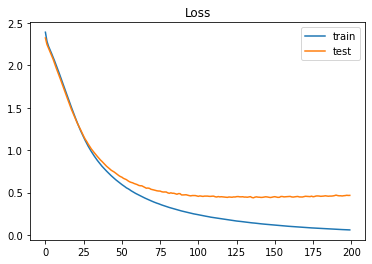

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

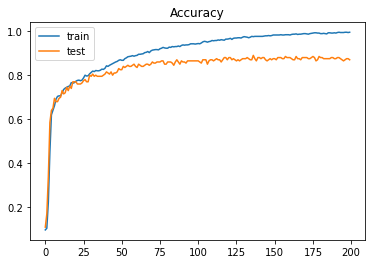

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

In [ ]:
from PIL import Image
import glob
import imageio as im
from scipy import misc 

In [ ]:
images=[]
#path="C:\\Users\\omarh\\Desktop\\picture\\Wang\\*.jpg"
#path='C:\\Users\\sylvi\\Desktop\\Wang\\*.jpg'
path="*.jpg"
for filename in glob.glob(path):
    im=Image.open(filename)
    images.append(im)

**Remarque :** l'ordre de l'importation est essentiel. Si on ouvre le fichier ipynb sous Google Colab et qu'on importe les images dans les fichiers avant d'exécuter le code, il y a de grande chance que cette ordre soit modifié. De plus, 1000 photos d'une taille cumulée de 42,9 Mo peut affecter le dique et la RAM du Google Colab.Cependant sur Jupiter Nootbook aucune modification de l'ordre a été observée. 

Pour ce faire une toute première idée de si l'odre a été modifiée ou pas, il suffit d'afficher le premier élément de la variable image qui correspond à l'image "0.jpg" soit 2 enfants dans la Jungle. 

Si on souhaite observer de manière plus concrète l'ordre d'importation si suffit de regarder "glob.glob(path)".

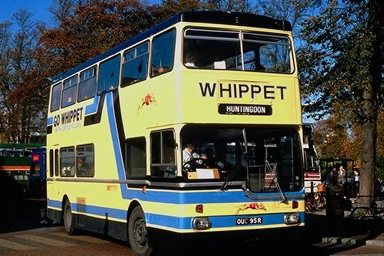

In [ ]:
images[0]

In [ ]:
print(glob.glob(path))

['329.jpg', '410.jpg', '749.jpg', '152.jpg', '844.jpg', '609.jpg', '871.jpg', '294.jpg', '693.jpg', '920.jpg', '408.jpg', '165.jpg', '746.jpg', '389.jpg', '417.jpg', '422.jpg', '748.jpg', '358.jpg', '527.jpg', '610.jpg', '536.jpg', '244.jpg', '434.jpg', '224.jpg', '424.jpg', '998.jpg', '957.jpg', '967.jpg', '327.jpg', '654.jpg', '589.jpg', '46.jpg', '916.jpg', '69.jpg', '710.jpg', '131.jpg', '85.jpg', '359.jpg', '156.jpg', '386.jpg', '8.jpg', '630.jpg', '496.jpg', '456.jpg', '103.jpg', '343.jpg', '237.jpg', '296.jpg', '519.jpg', '179.jpg', '22.jpg', '168.jpg', '380.jpg', '62.jpg', '122.jpg', '275.jpg', '572.jpg', '745.jpg', '551.jpg', '976.jpg', '68.jpg', '619.jpg', '628.jpg', '262.jpg', '823.jpg', '769.jpg', '120.jpg', '160.jpg', '115.jpg', '631.jpg', '34.jpg', '838.jpg', '279.jpg', '686.jpg', '263.jpg', '50.jpg', '65.jpg', '409.jpg', '632.jpg', '829.jpg', '789.jpg', '283.jpg', '792.jpg', '901.jpg', '841.jpg', '349.jpg', '51.jpg', '364.jpg', '839.jpg', '825.jpg', '178.jpg', '837.jpg',

In [ ]:
new_images=np.empty(shape=(1000,256,384,3))
for i in range(1000):
    if np.shape(np.array(images[i]))==(256,384,3):
        new_images[i,]=np.array(images[i])
    else:
        new_images[i,]=np.array(images[i].transpose(Image.ROTATE_90))
new_images.shape

(1000, 256, 384, 3)

In [ ]:
Y=[]
for i in range(1000):
    Y.append(int(LABEL[i]))
Y=np.array(Y)
Y[1:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1])

**Remarque :** stratégie utilisée pour 
développer l'apprentissage Multicouche.

Même si l'apprentissage Multicouche peut s'avérer compliqué à comprendre et à appliquer, les connaissances en amont de l'UE de "Réseaux de neurones" acquisent en M1 STDV à travers l'UE "Supervised learning", nous ont permis d'assimiler plus facilement la compréhension de l'énoncé et des consignes souhaitées. De plus, les connaissances acquises dans l'UE de "Réseaux de neurones" ainsi que les codes associés, nous ont été d'une grande aide pour orienter nos recherches, nos programmes etc. 

#### **2.1.3 Approche “Deep” (basée Data)**


In [ ]:
model1 = Sequential()
model1.add(layers.Conv2D(32, (3, 3),input_shape=(256, 384,3),activation="relu"))
model1.add(layers.Conv2D(32, (3, 3),activation="relu"))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Flatten())
model1.add(Dense(10, activation="softmax"))
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
X_train1,X_test1,Y_train1,Y_test1=train_test_split(new_images,Y,test_size=0.2,random_state=1)
history=model1.fit(X_train1, Y_train1,validation_data=(X_test1, Y_test1),epochs=5)

Epoch 1/5
 2/25 [=>............................] - ETA: 3:11 - loss: 2860.7009 - accuracy: 0.1094

KeyboardInterrupt: ignored

In [ ]:
H=predict_classes(model1,X_test1)
taux_succès1=metrics.accuracy_score(Y_test1,H)

print(1-taux_succès1)

print(metrics.confusion_matrix(Y_test1,H))

7/7 [==============================] - 12s 2s/step
0.895
[[ 0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  0  0 21  0]
 [ 0  0  0  0  0  0  0  0 17  0]]


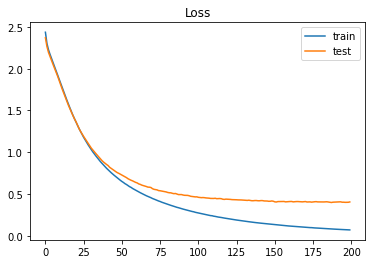

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

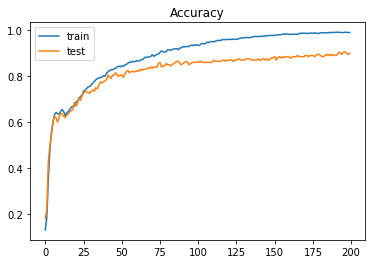

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

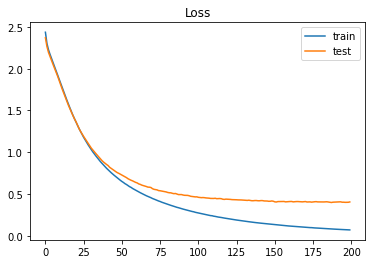

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

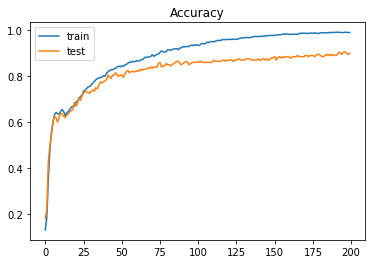

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()